In [1]:
# import necessary libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Excel Data
file_path = "D:/file/Aviation_KPIs_Dataset.xlsx"
df = pd.read_excel(file_path)
df

Flight Number Scheduled Departure Time   Actual Departure Time  \
0              FL885  2024-05-20 11:51:21.328 2024-07-10 02:38:53.731   
1              FL930  2024-01-23 06:56:22.686 2024-07-07 02:53:44.150   
2              FL478  2024-05-30 09:18:38.578 2024-12-05 01:00:54.473   
3              FL637  2024-08-15 05:21:46.814 2024-09-21 13:23:41.615   
4              FL318  2024-07-25 15:29:58.467 2024-03-21 15:05:54.375   
...              ...                      ...                     ...   
199995         FL073  2024-09-04 21:05:15.412 2024-01-13 21:04:09.763   
199996         FL732  2024-01-25 21:17:59.229 2024-01-21 00:57:55.187   
199997         FL519  2024-10-19 08:31:23.941 2024-06-04 03:40:50.357   
199998         FL585  2024-01-04 04:35:19.610 2024-02-06 01:57:18.075   
199999         FL590  2024-07-13 06:04:41.316 2024-09-04 04:21:53.988   

        Delay (Minutes)  Aircraft Utilization (Hours/Day)  \
0                    50                             12.36   
1                    27                             14.53   
2                   108                             10.73   
3                    64                             15.10   
4                    30                             13.46   
...                 ...                               ...   
199995               28                             14.86   
199996               48                              8.67   
199997               83                             12.80   
199998               55                             12.53   
199999              109                              8.14   

        Turnaround Time (Minutes)  Load Factor (%)  Fleet Availability (%)  \
0                             115            79.18                   96.24   
1                              83            98.59                   80.49   
2                              87            67.44                   97.90   
3                              99            69.01                   80.17   
4                             114            50.36                   82.23   
...                           ...              ...                     ...   
199995                         38            60.12                   97.56   
199996                         34            77.77                   87.05   
199997                         58            93.12                   80.84   
199998                        115            99.04                   85.82   
199999                         35            74.97                   72.95   

        Maintenance Downtime (Hours)  Fuel Efficiency (ASK)  Revenue (USD)  \
0                               9.21                   4.15       10953.75   
1                               1.55                   3.93       31597.25   
2                               2.06                   4.26       13700.27   
3                               6.85                   4.13       39913.01   
4                               7.30                   4.97       11531.48   
...                              ...                    ...            ...   
199995                          8.44                   2.16       20903.43   
199996                          8.13                   3.26       39601.03   
199997                          9.80                   3.68       36100.34   
199998                          6.84                   4.70        8157.56   
199999                          4.77                   4.80       16808.78   

        Operating Cost (USD)  Net Profit Margin (%)  Ancillary Revenue (USD)  \
0                   27847.59                  17.90                  1058.68   
1                    1564.41                   7.70                  2941.32   
2                   30494.88                   5.84                  1920.45   
3                   13444.09                  24.09                  3167.79   
4                   34668.98                   7.18                   619.80   
...                      ...               

In [3]:
# Diplaying the top 5 rows
df.head()

Flight Number Scheduled Departure Time   Actual Departure Time  \
0         FL885  2024-05-20 11:51:21.328 2024-07-10 02:38:53.731   
1         FL930  2024-01-23 06:56:22.686 2024-07-07 02:53:44.150   
2         FL478  2024-05-30 09:18:38.578 2024-12-05 01:00:54.473   
3         FL637  2024-08-15 05:21:46.814 2024-09-21 13:23:41.615   
4         FL318  2024-07-25 15:29:58.467 2024-03-21 15:05:54.375   

   Delay (Minutes)  Aircraft Utilization (Hours/Day)  \
0               50                             12.36   
1               27                             14.53   
2              108                             10.73   
3               64                             15.10   
4               30                             13.46   

   Turnaround Time (Minutes)  Load Factor (%)  Fleet Availability (%)  \
0                        115            79.18                   96.24   
1                         83            98.59                   80.49   
2                         87            67.44                   97.90   
3                         99            69.01                   80.17   
4                        114            50.36                   82.23   

   Maintenance Downtime (Hours)  Fuel Efficiency (ASK)  Revenue (USD)  \
0                          9.21                   4.15       10953.75   
1                          1.55                   3.93       31597.25   
2                          2.06                   4.26       13700.27   
3                          6.85                   4.13       39913.01   
4                          7.30                   4.97       11531.48   

   Operating Cost (USD)  Net Profit Margin (%)  Ancillary Revenue (USD)  \
0              27847.59                  17.90                  1058.68   
1               1564.41                   7.70                  2941.32   
2              30494.88                   5.84                  1920.45   
3              13444.09                  24.09                  3167.79   
4              34668.98                   7.18                   619.80   

   Debt-to-Equity Ratio  Revenue per ASK  Cost per ASK  Profit (USD)  
0                  2.46          2639.46       6710.26     -16893.84  
1                  2.89          8040.01        398.07      30032.84  
2                  1.34          3216.03       7158.42     -16794.61  
3                  0.60          9664.17       3255.23      26468.92  
4                  0.84          2320.22       6975.65     -23137.50

# Data Cleaning

In [5]:
df.shape

(200000, 18)

In [6]:
df.columns

Index(['Flight Number', 'Scheduled Departure Time', 'Actual Departure Time',
       'Delay (Minutes)', 'Aircraft Utilization (Hours/Day)',
       'Turnaround Time (Minutes)', 'Load Factor (%)',
       'Fleet Availability (%)', 'Maintenance Downtime (Hours)',
       'Fuel Efficiency (ASK)', 'Revenue (USD)', 'Operating Cost (USD)',
       'Net Profit Margin (%)', 'Ancillary Revenue (USD)',
       'Debt-to-Equity Ratio', 'Revenue per ASK', 'Cost per ASK',
       'Profit (USD)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Flight Number                     200000 non-null  object        
 1   Scheduled Departure Time          200000 non-null  datetime64[ns]
 2   Actual Departure Time             200000 non-null  datetime64[ns]
 3   Delay (Minutes)                   200000 non-null  int64         
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64       
 5   Turnaround Time (Minutes)         200000 non-null  int64         
 6   Load Factor (%)                   200000 non-null  float64       
 7   Fleet Availability (%)            200000 non-null  float64       
 8   Maintenance Downtime (Hours)      200000 non-null  float64       
 9   Fuel Efficiency (ASK)             200000 non-null  float64       
 10  Revenue (USD)                   

In [8]:
df.describe()

Scheduled Departure Time          Actual Departure Time  \
count                         200000                         200000   
mean   2024-06-29 07:21:27.047897856  2024-06-29 08:55:04.198966016   
min       2024-01-01 00:01:53.341000     2024-01-01 00:03:33.981000   
25%    2024-03-30 22:12:47.147000064  2024-03-30 15:40:28.572750080   
50%    2024-06-29 10:33:27.125000192  2024-06-28 20:10:25.013499904   
75%    2024-09-27 09:33:27.652499968  2024-09-28 03:54:08.405749760   
max       2024-12-27 05:14:38.598000     2024-12-27 05:07:36.226000   
std                              NaN                            NaN   

       Delay (Minutes)  Aircraft Utilization (Hours/Day)  \
count     200000.00000                     200000.000000   
mean          59.35885                         12.003438   
min            0.00000                          8.000000   
25%           29.00000                          9.990000   
50%           59.00000                         12.010000   
75%           89.00000                         14.010000   
max          119.00000                         16.000000   
std           34.67602                          2.311966   

       Turnaround Time (Minutes)  Load Factor (%)  Fleet Availability (%)  \
count              200000.000000    200000.000000           200000.000000   
mean                   74.451680        74.997178               85.001378   
min                    30.000000        50.000000               70.000000   
25%                    52.000000        62.500000               77.480000   
50%                    74.000000        74.960000               85.000000   
75%                    97.000000        87.530000               92.530000   
max                   119.000000       100.000000              100.000000   
std                    25.977826        14.439393                8.672413   

       Maintenance Downtime (Hours)  Fuel Efficiency (ASK)  Revenue (USD)  \
count                 200000.000000          200000.000000  200000.000000   
mean                       5.503103               3.496959   25571.448338   
min                        1.000000               2.000000    1000.060000   
25%                        3.250000               2.750000   13297.042500   
50%                        5.500000               3.490000   25566.300000   
75%                        7.760000               4.250000   37860.402500   
max                       10.000000               5.000000   49999.950000   
std                        2.601257               0.865309   14158.512116   

       Operating Cost (USD)  Net Profit Margin (%)  Ancillary Revenue (USD)  \
count         200000.000000          200000.000000            200000.000000   
mean           20429.003323              15.011169              2550.025537   
min              800.030000               5.000000               100.020000   
25%            10609.022500              10.010000              1325.570000   
50%            20410.885000              15.000000              2544.210000   
75%            30245.907500              20.010000              3776.387500   
max            39999.840000              25.000000              5000.000000   
std            11316.410641               5.778340              1414.291993   

       Debt-to-Equity Ratio  Revenue per ASK   Cost per ASK   Profit (USD)  
count         200000.000000    200000.000000  200000.000000  200000.000000  
mean               1.752445      7818.578193    6245.613443    5142.445015  
min                0.500000       203.110000     164.830000  -38973.960000  
25%                1.130000      3812.782500    3041.547500   -7983.690000  
50%                1.750000      7315.460000    5834.705000    5216.975000  
75%                2.370000     10909.272500    8715.670000   18269.647500  
max                3.000000     24999.340000   19928.340000   49054.690000  
std                0.720194      4947.028923    3957.358310   18123.595784

In [9]:
df.isnull().sum()

Flight Number                       0
Scheduled Departure Time            0
Actual Departure Time               0
Delay (Minutes)                     0
Aircraft Utilization (Hours/Day)    0
Turnaround Time (Minutes)           0
Load Factor (%)                     0
Fleet Availability (%)              0
Maintenance Downtime (Hours)        0
Fuel Efficiency (ASK)               0
Revenue (USD)                       0
Operating Cost (USD)                0
Net Profit Margin (%)               0
Ancillary Revenue (USD)             0
Debt-to-Equity Ratio                0
Revenue per ASK                     0
Cost per ASK                        0
Profit (USD)                        0
dtype: int64

# Data Visualization 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Style
sns.set_style("whitegrid")

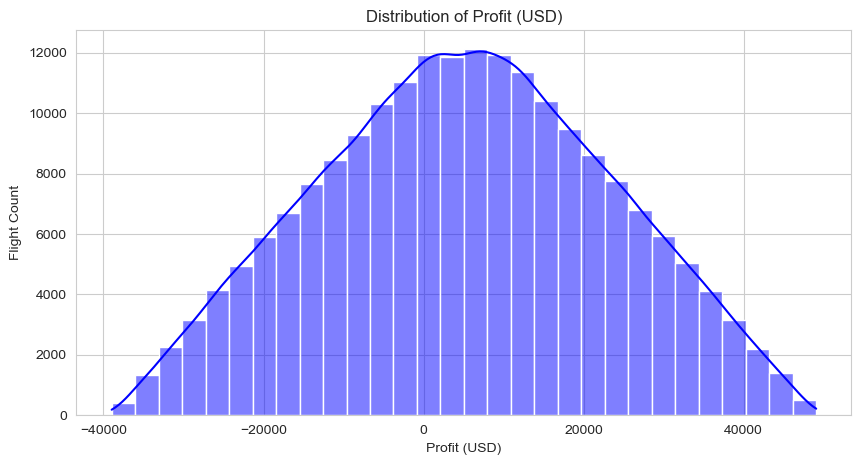

In [12]:
# Distribution of Profit 
plt.figure(figsize=(10, 5))
sns.histplot(df["Profit (USD)"], bins=30, kde=True, color="blue")
plt.title("Distribution of Profit (USD)")
plt.xlabel("Profit (USD)")
plt.ylabel("Flight Count")
plt.show()

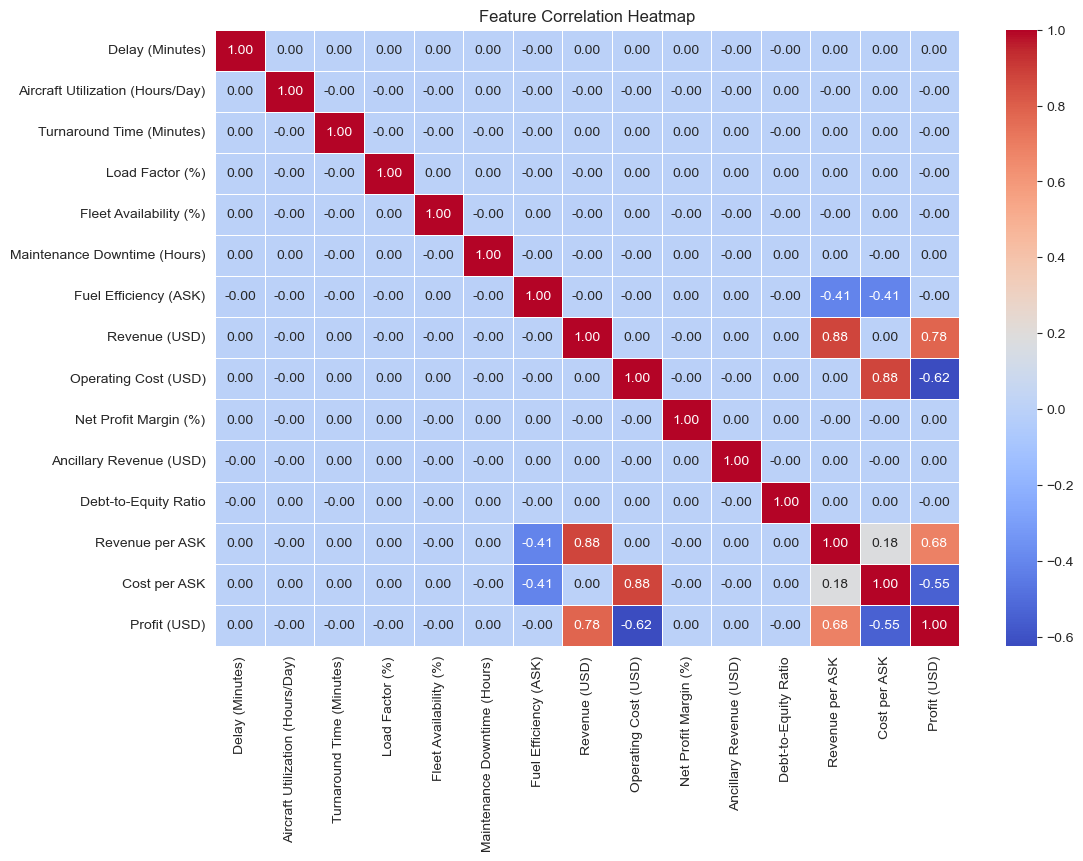

In [13]:
#Correlation Heatmap
numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\dhudi\AppData\Local\Temp\ipykernel_11216\1485748875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pd.cut(df["Delay (Minutes)"], bins=[0, 30, 60, 120, 300], labels=["<30 min", "30-60 min", "1-2 hrs", "2+ hrs"]),


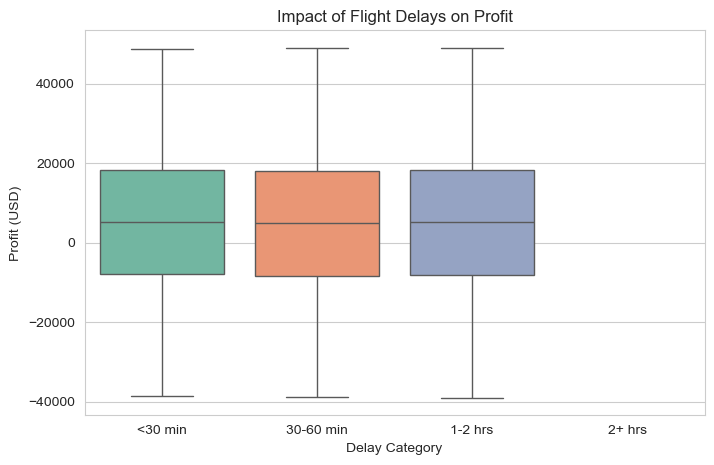

In [14]:
#Delay vs. Profit Impact
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.cut(df["Delay (Minutes)"], bins=[0, 30, 60, 120, 300], labels=["<30 min", "30-60 min", "1-2 hrs", "2+ hrs"]),
            y=df["Profit (USD)"], palette="Set2")
plt.title("Impact of Flight Delays on Profit")
plt.xlabel("Delay Category")
plt.ylabel("Profit (USD)")
plt.show()

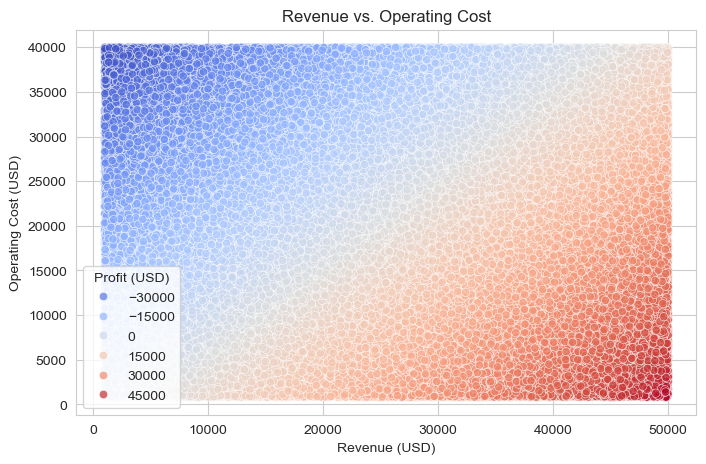

In [15]:
#Revenue vs. Operating Cost
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Revenue (USD)"], y=df["Operating Cost (USD)"], hue=df["Profit (USD)"], palette="coolwarm", alpha=0.7)
plt.title("Revenue vs. Operating Cost")
plt.xlabel("Revenue (USD)")
plt.ylabel("Operating Cost (USD)")
plt.show()

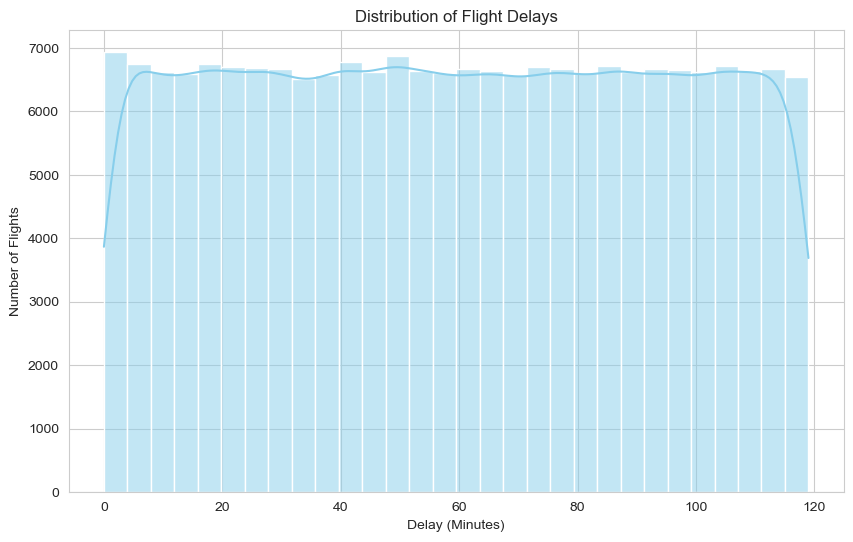

In [16]:
#Distribution of Flight Delays
plt.figure(figsize=(10, 6))
sns.histplot(df["Delay (Minutes)"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Flight Delays")
plt.xlabel("Delay (Minutes)")
plt.ylabel("Number of Flights")
plt.show()

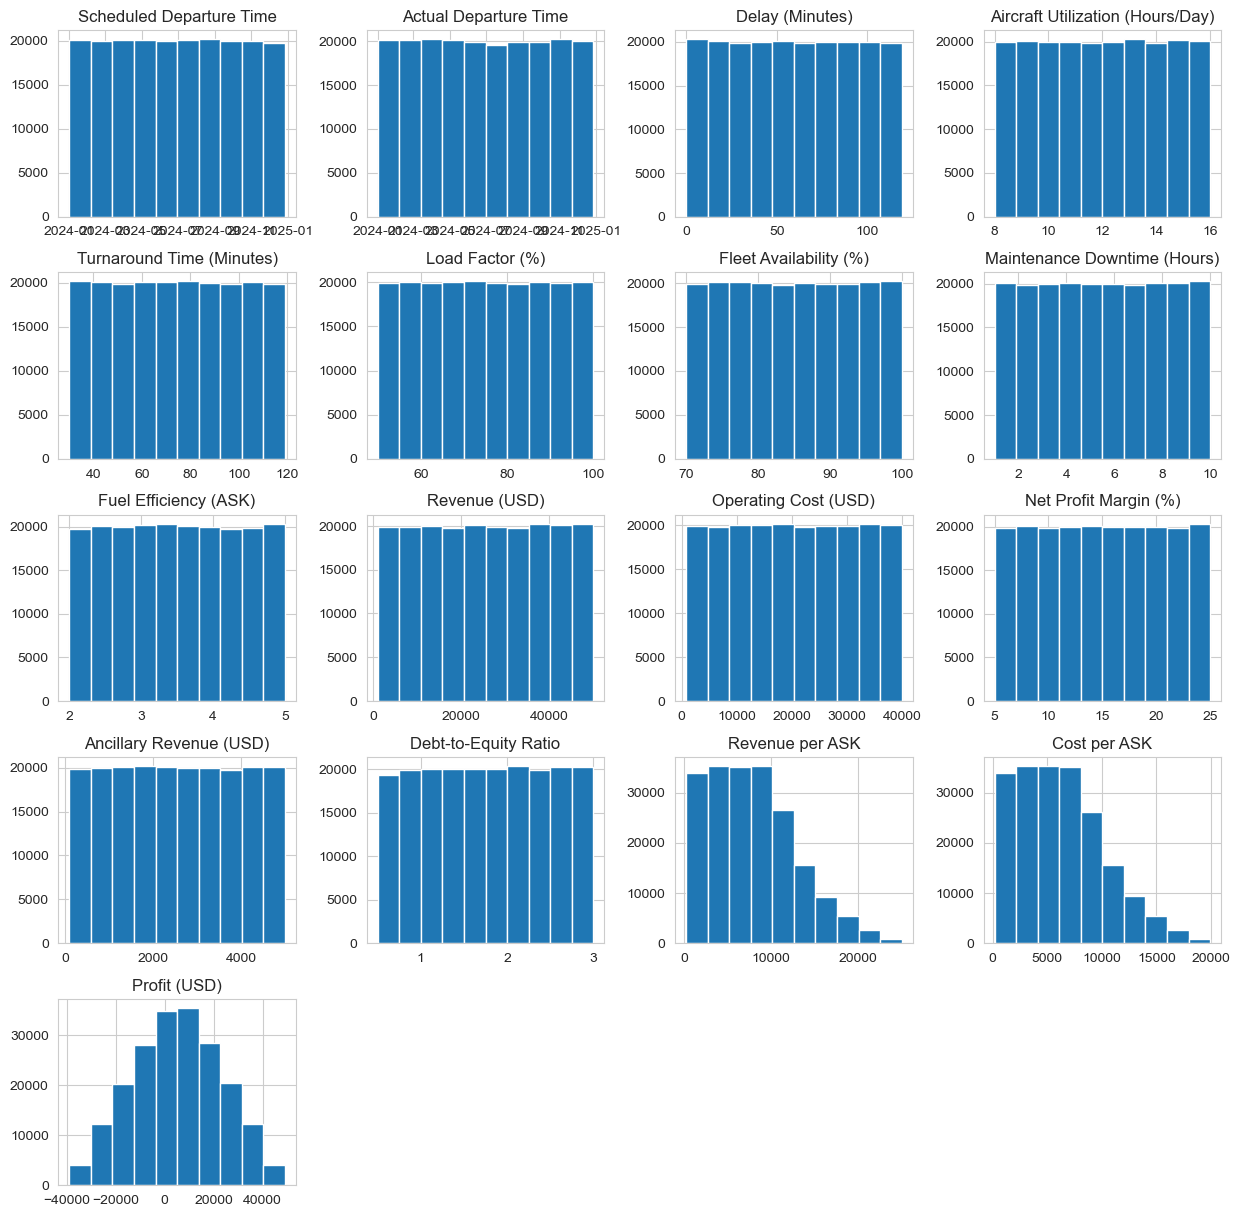

In [17]:
df.hist(figsize=(15,15));

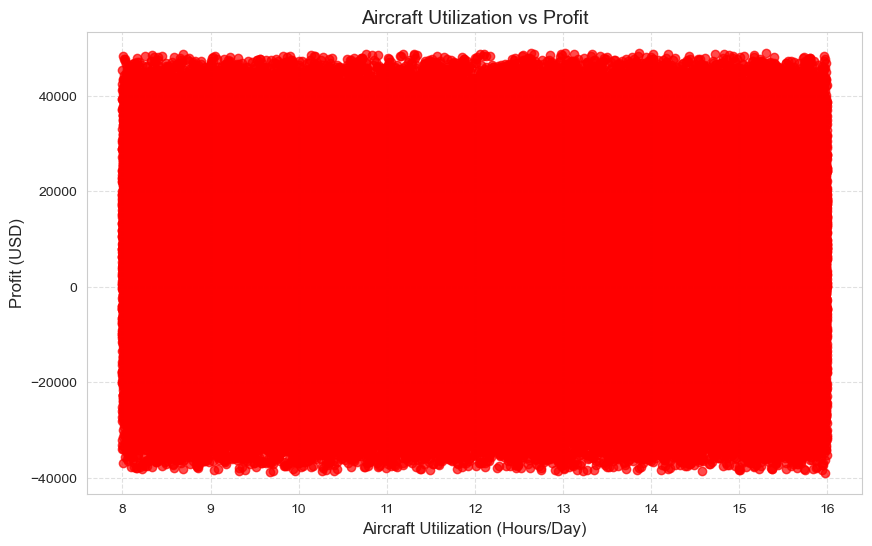

In [18]:
# Aircraft Utilization vs Profit
plt.figure(figsize=(10, 6))
plt.scatter(df["Aircraft Utilization (Hours/Day)"], df["Profit (USD)"], color="red", alpha=0.7)

# Titles and labels
plt.title("Aircraft Utilization vs Profit", fontsize=14)
plt.xlabel("Aircraft Utilization (Hours/Day)", fontsize=12)
plt.ylabel("Profit (USD)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()

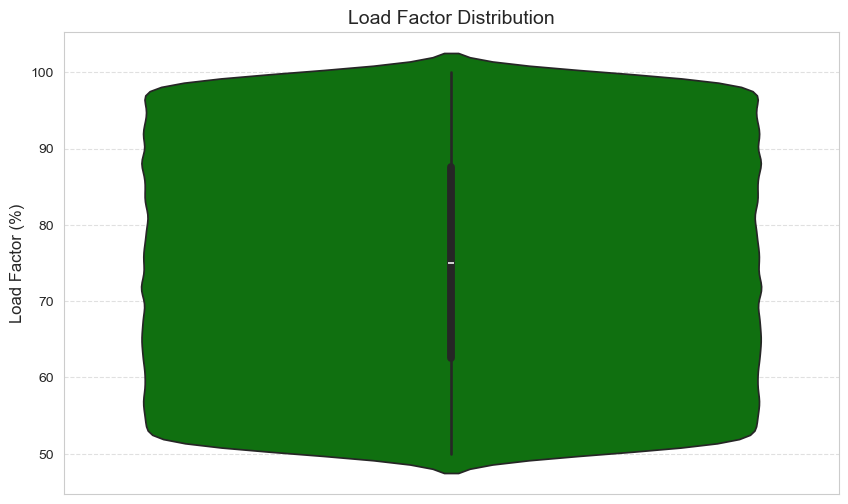

In [19]:
# Load Factor Distribution
plt.figure(figsize=(10, 6))
sns.violinplot(y=df["Load Factor (%)"], color="green")

plt.title("Load Factor Distribution", fontsize=14)
plt.ylabel("Load Factor (%)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

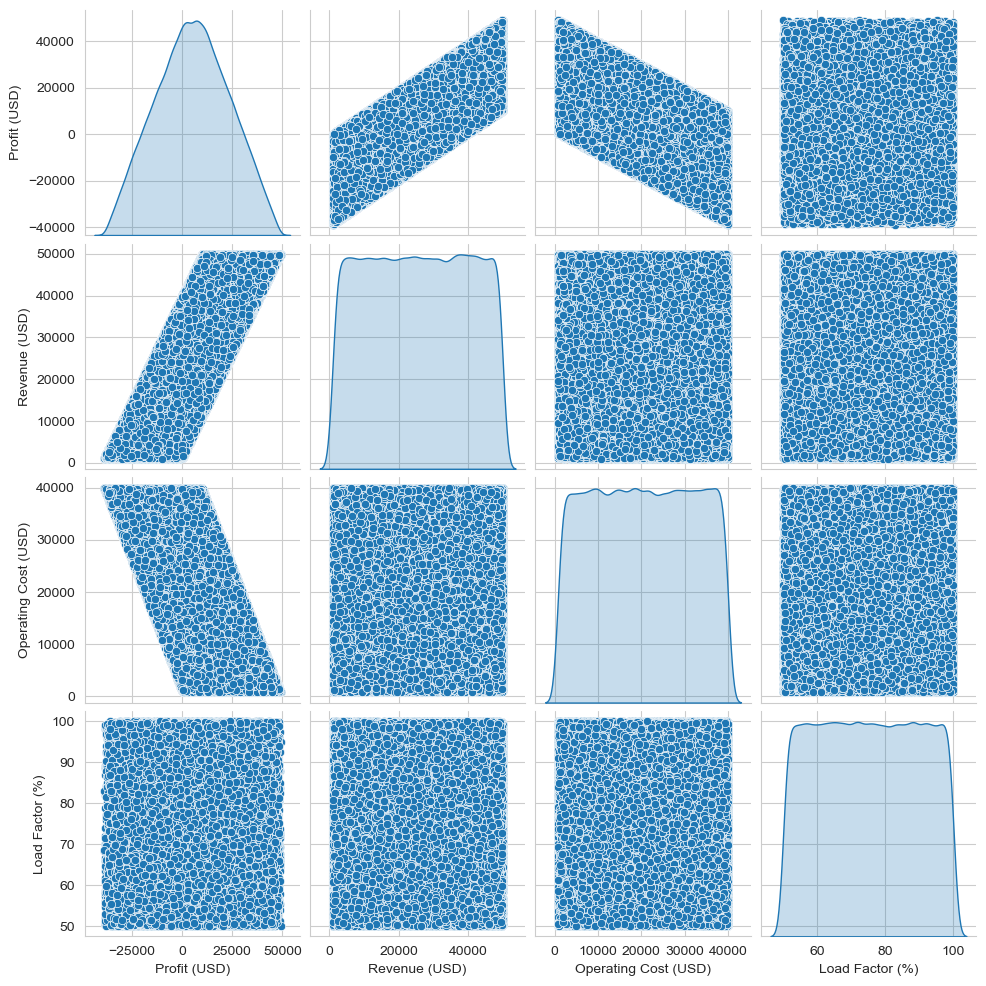

In [20]:
sns.pairplot(df[["Profit (USD)", "Revenue (USD)", "Operating Cost (USD)", "Load Factor (%)"]], diag_kind="kde")
plt.show()

C:\Users\dhudi\AppData\Local\Temp\ipykernel_11216\1118428302.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Fuel Efficiency (ASK)"], shade=True, color="purple")


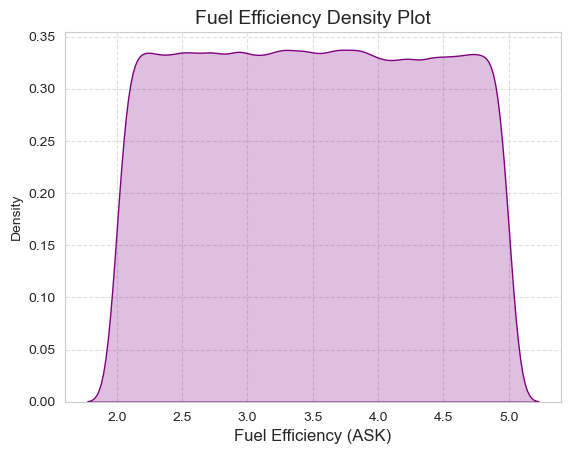

In [28]:
# Fuel Efficiency Density Plot
sns.kdeplot(df["Fuel Efficiency (ASK)"], shade=True, color="purple")
plt.title("Fuel Efficiency Density Plot", fontsize=14)
plt.xlabel("Fuel Efficiency (ASK)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

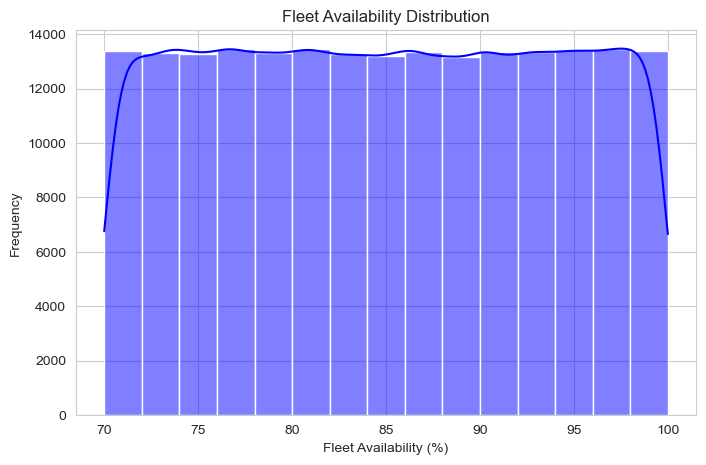

In [30]:
#Fleet Availability Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Fleet Availability (%)'], bins=15, kde=True, color="blue")
plt.title("Fleet Availability Distribution")
plt.xlabel("Fleet Availability (%)")
plt.ylabel("Frequency")
plt.show()

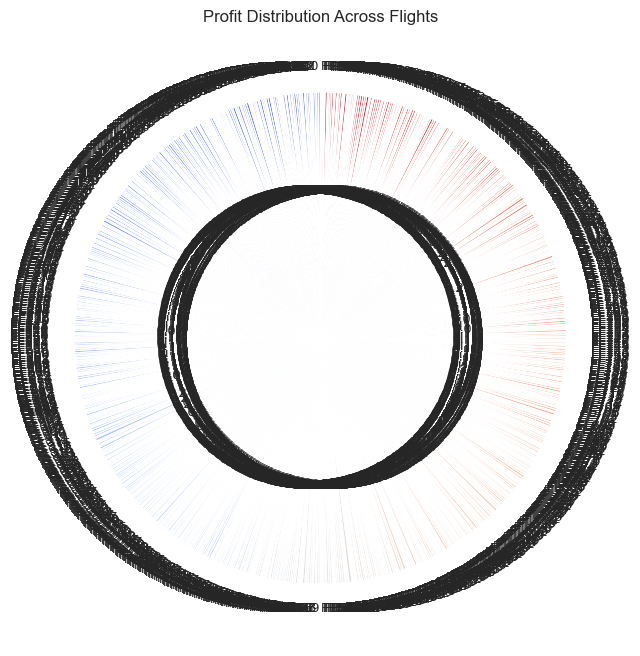

In [32]:
#Profit per Flight
plt.figure(figsize=(8, 8))
profit_per_flight = df.groupby("Flight Number")["Profit (USD)"].sum()
profit_per_flight.plot.pie(autopct='%2.1f%%', cmap="coolwarm", startangle=90)
plt.title("Profit Distribution Across Flights")
plt.ylabel("")
plt.show()

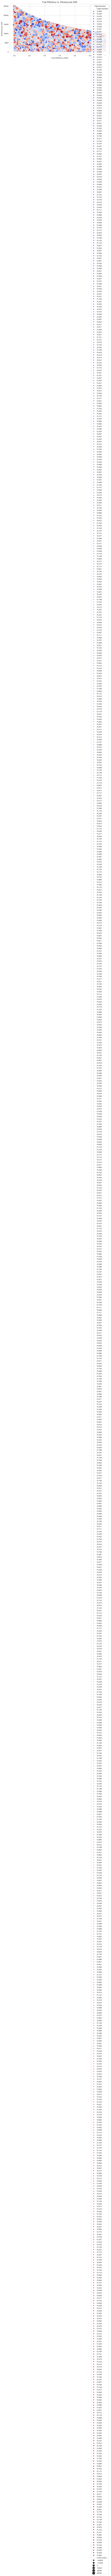

In [34]:
#Fuel Efficiency (ASK) vs. Revenue per ASK
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["Fuel Efficiency (ASK)"], y=df["Revenue per ASK"], hue=df["Flight Number"], size=df["Profit (USD)"], palette="coolwarm", sizes=(50, 300))
plt.title("Fuel Efficiency vs. Revenue per ASK")
plt.xlabel("Fuel Efficiency (ASK)")
plt.ylabel("Revenue per ASK")
plt.legend(title="Flight Number")
plt.show()

C:\Users\dhudi\AppData\Local\Temp\ipykernel_11216\4029610800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Flight Number', y='Profit (USD)', data=df, palette='coolwarm')


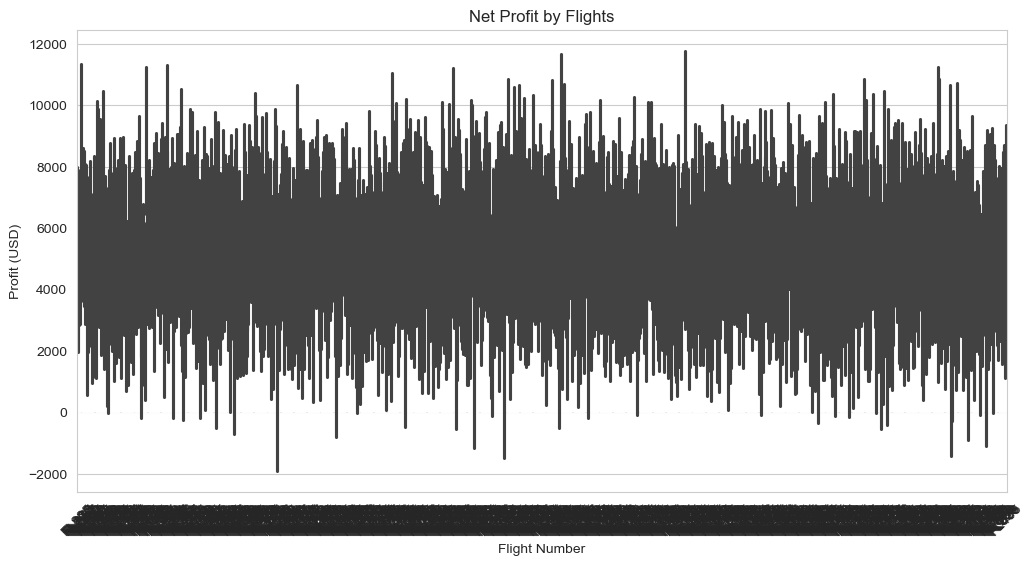

In [36]:
# Net Profit vs Flights
plt.figure(figsize=(12, 6))
sns.barplot(x='Flight Number', y='Profit (USD)', data=df, palette='coolwarm')
plt.title('Net Profit by Flights')
plt.xlabel('Flight Number')
plt.ylabel('Profit (USD)')
plt.xticks(rotation=45)
plt.show()

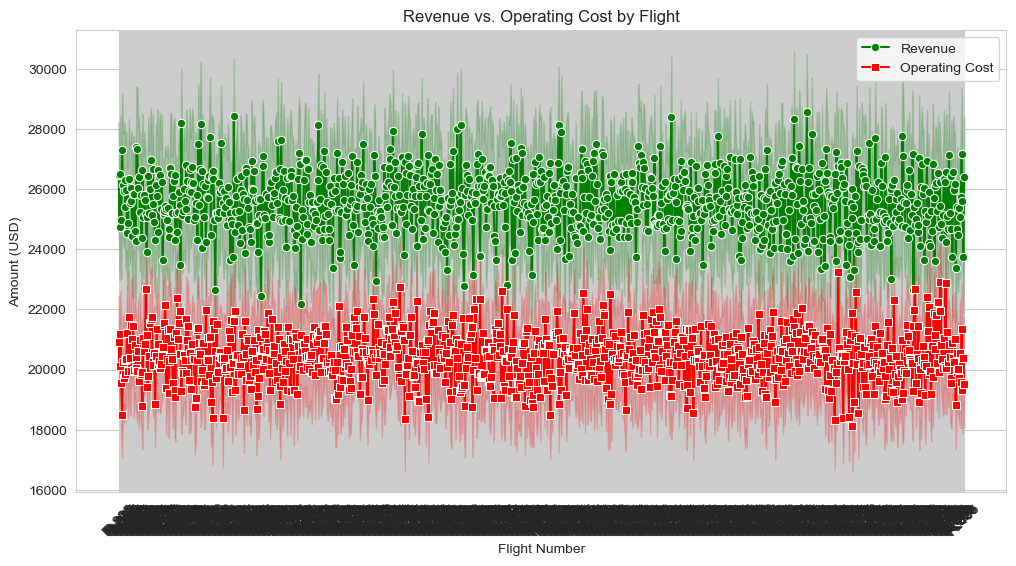

In [38]:
#Revenue vs Operating Cost by Flights
plt.figure(figsize=(12, 6))
sns.lineplot(x='Flight Number', y='Revenue (USD)', data=df, label='Revenue', marker='o', color='green')
sns.lineplot(x='Flight Number', y='Operating Cost (USD)', data=df, label='Operating Cost', marker='s', color='red')
plt.title('Revenue vs. Operating Cost by Flight')
plt.xlabel('Flight Number')
plt.ylabel('Amount (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.show()